# Prédiction des résultats des match avec le perceptron

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Permet d'afficher les figures directement dans le notebook:
%matplotlib inline
%run ./classes_utiles_learning.ipynb

In [2]:
train_data = np.load("./train_data.npy")
train_labels = np.load("./train_labels.npy")
test_data = np.load("./test_data.npy")
test_labels = np.load("./test_labels.npy")

In [3]:
train_set = LabeledSet(len(train_data[0]))
for i in range(len(train_data)):
    train_set.addExample(train_data[i], [train_labels[i]])

In [4]:
test_set = LabeledSet(len(test_data[0]))
for i in range(len(test_data)):
    test_set.addExample(test_data[i], [test_labels[i]])

In [5]:
class KernelBias:
    
    def __init__(self, input_dimension):
        self.kernelDimension = input_dimension + 1
    
    def transform(self,x):
        y = np.copy(x)
        y = np.insert(y, y.size, 1)
        return y

In [6]:
class KernelPoly:
    
    def __init__(self, input_dimension):
        self.kernelDimension = input_dimension + int((((input_dimension * (input_dimension + 1))*1.0)/2)) + 1
    
    def transform(self,x):
        tab = []
        for i in range(len(x)):
            for j in x[i:]:
                tab.append(x[i]*j)
        
        tab.append(1)
        x2 = np.concatenate((x, np.array(tab)), axis=0)
        return x2

In [7]:
class PerceptronKernel(Classifier):
    
    def __init__(self,dimension_kernel,learning_rate,kernel):
        self.kernelDimension = dimension_kernel
        self.learning_rate= learning_rate
        self.kernel= kernel
        self.w = np.random.randn(dimension_kernel)
        
    #Permet de calculer la prediction sur x => renvoie un score
    def predict(self,x):
        x2 = self.kernel.transform(x)
        h = np.dot(x2, self.w)
        if(h >=0):
            return +1
        else:
            return -1
        
    #appelé seulement par la methode train pusique je fais deja un trnaform de x dans le train afin de faire la mise
    # a jour de self.w
    def predict_appel_train(self, x):
        h = np.dot(x, self.w)
        if(h >=0):
            return +1
        else:
            return -1

    
    #Permet d'entrainer le modele sur un ensemble de données
    def train(self,labeledSet):
        liste_indices = np.arange(labeledSet.size())
        np.random.shuffle(liste_indices)
        
        for i in liste_indices:
            x = labeledSet.getX(i)
            y = labeledSet.getY(i)

            x2 = self.kernel.transform(x)
            
            if(((self.predict_appel_train(x2))*y) < 0):
                
                self.w = self.w + self.learning_rate * (x2 * y)

# KERNEL POLYNOMIAL

In [8]:
k=KernelPoly(len(train_data[0]))
perceptron = PerceptronKernel(k.kernelDimension, 0.00001, k)
for i in range(5000):
    print("iter "+str(i))
    perceptron.train(train_set)
    accuracy = perceptron.accuracy(test_set)
    print("fin iter "+str(i))
    np.save("./perceptron_accuracy_values/polynomial/iter"+str(i), accuracy)

iter 0
fin iter 0
iter 1
fin iter 1
iter 2
fin iter 2
iter 3
fin iter 3
iter 4
fin iter 4
iter 5
fin iter 5
iter 6
fin iter 6
iter 7
fin iter 7
iter 8
fin iter 8
iter 9
fin iter 9
iter 10
fin iter 10
iter 11
fin iter 11
iter 12
fin iter 12
iter 13
fin iter 13
iter 14
fin iter 14
iter 15
fin iter 15
iter 16
fin iter 16
iter 17
fin iter 17
iter 18
fin iter 18
iter 19
fin iter 19
iter 20
fin iter 20
iter 21
fin iter 21
iter 22
fin iter 22
iter 23
fin iter 23
iter 24
fin iter 24
iter 25
fin iter 25
iter 26
fin iter 26
iter 27
fin iter 27
iter 28
fin iter 28
iter 29
fin iter 29
iter 30
fin iter 30
iter 31
fin iter 31
iter 32
fin iter 32
iter 33
fin iter 33
iter 34
fin iter 34
iter 35
fin iter 35
iter 36
fin iter 36
iter 37
fin iter 37
iter 38
fin iter 38
iter 39
fin iter 39
iter 40
fin iter 40
iter 41
fin iter 41
iter 42
fin iter 42
iter 43
fin iter 43
iter 44
fin iter 44
iter 45
fin iter 45
iter 46
fin iter 46
iter 47
fin iter 47
iter 48
fin iter 48
iter 49
fin iter 49
iter 50
fin iter 50


fin iter 382
iter 383
fin iter 383
iter 384
fin iter 384
iter 385
fin iter 385
iter 386
fin iter 386
iter 387
fin iter 387
iter 388
fin iter 388
iter 389
fin iter 389
iter 390
fin iter 390
iter 391
fin iter 391
iter 392
fin iter 392
iter 393
fin iter 393
iter 394
fin iter 394
iter 395
fin iter 395
iter 396
fin iter 396
iter 397
fin iter 397
iter 398
fin iter 398
iter 399
fin iter 399
iter 400
fin iter 400
iter 401
fin iter 401
iter 402
fin iter 402
iter 403
fin iter 403
iter 404
fin iter 404
iter 405
fin iter 405
iter 406
fin iter 406
iter 407
fin iter 407
iter 408
fin iter 408
iter 409
fin iter 409
iter 410
fin iter 410
iter 411
fin iter 411
iter 412
fin iter 412
iter 413
fin iter 413
iter 414
fin iter 414
iter 415
fin iter 415
iter 416
fin iter 416
iter 417
fin iter 417
iter 418
fin iter 418
iter 419
fin iter 419
iter 420
fin iter 420
iter 421
fin iter 421
iter 422
fin iter 422
iter 423
fin iter 423
iter 424
fin iter 424
iter 425
fin iter 425
iter 426
fin iter 426
iter 427
fin iter 4

fin iter 755
iter 756
fin iter 756
iter 757
fin iter 757
iter 758
fin iter 758
iter 759
fin iter 759
iter 760
fin iter 760
iter 761
fin iter 761
iter 762
fin iter 762
iter 763
fin iter 763
iter 764
fin iter 764
iter 765
fin iter 765
iter 766
fin iter 766
iter 767
fin iter 767
iter 768
fin iter 768
iter 769
fin iter 769
iter 770
fin iter 770
iter 771
fin iter 771
iter 772
fin iter 772
iter 773
fin iter 773
iter 774
fin iter 774
iter 775
fin iter 775
iter 776
fin iter 776
iter 777
fin iter 777
iter 778
fin iter 778
iter 779
fin iter 779
iter 780
fin iter 780
iter 781
fin iter 781
iter 782
fin iter 782
iter 783
fin iter 783
iter 784
fin iter 784
iter 785
fin iter 785
iter 786
fin iter 786
iter 787
fin iter 787
iter 788
fin iter 788
iter 789
fin iter 789
iter 790
fin iter 790
iter 791
fin iter 791
iter 792
fin iter 792
iter 793
fin iter 793
iter 794
fin iter 794
iter 795
fin iter 795
iter 796
fin iter 796
iter 797
fin iter 797
iter 798
fin iter 798
iter 799
fin iter 799
iter 800
fin iter 8

fin iter 1117
iter 1118
fin iter 1118
iter 1119
fin iter 1119
iter 1120
fin iter 1120
iter 1121
fin iter 1121
iter 1122
fin iter 1122
iter 1123
fin iter 1123
iter 1124
fin iter 1124
iter 1125
fin iter 1125
iter 1126
fin iter 1126
iter 1127
fin iter 1127
iter 1128
fin iter 1128
iter 1129
fin iter 1129
iter 1130
fin iter 1130
iter 1131
fin iter 1131
iter 1132
fin iter 1132
iter 1133
fin iter 1133
iter 1134
fin iter 1134
iter 1135
fin iter 1135
iter 1136
fin iter 1136
iter 1137
fin iter 1137
iter 1138
fin iter 1138
iter 1139
fin iter 1139
iter 1140
fin iter 1140
iter 1141
fin iter 1141
iter 1142
fin iter 1142
iter 1143
fin iter 1143
iter 1144
fin iter 1144
iter 1145
fin iter 1145
iter 1146
fin iter 1146
iter 1147
fin iter 1147
iter 1148
fin iter 1148
iter 1149
fin iter 1149
iter 1150
fin iter 1150
iter 1151
fin iter 1151
iter 1152
fin iter 1152
iter 1153
fin iter 1153
iter 1154
fin iter 1154
iter 1155
fin iter 1155
iter 1156
fin iter 1156
iter 1157
fin iter 1157
iter 1158
fin iter 1158
it

fin iter 1459
iter 1460
fin iter 1460
iter 1461
fin iter 1461
iter 1462
fin iter 1462
iter 1463
fin iter 1463
iter 1464
fin iter 1464
iter 1465
fin iter 1465
iter 1466
fin iter 1466
iter 1467
fin iter 1467
iter 1468
fin iter 1468
iter 1469
fin iter 1469
iter 1470
fin iter 1470
iter 1471
fin iter 1471
iter 1472
fin iter 1472
iter 1473
fin iter 1473
iter 1474
fin iter 1474
iter 1475
fin iter 1475
iter 1476
fin iter 1476
iter 1477
fin iter 1477
iter 1478
fin iter 1478
iter 1479
fin iter 1479
iter 1480
fin iter 1480
iter 1481
fin iter 1481
iter 1482
fin iter 1482
iter 1483
fin iter 1483
iter 1484
fin iter 1484
iter 1485
fin iter 1485
iter 1486
fin iter 1486
iter 1487
fin iter 1487
iter 1488
fin iter 1488
iter 1489
fin iter 1489
iter 1490
fin iter 1490
iter 1491
fin iter 1491
iter 1492
fin iter 1492
iter 1493
fin iter 1493
iter 1494
fin iter 1494
iter 1495
fin iter 1495
iter 1496
fin iter 1496
iter 1497
fin iter 1497
iter 1498
fin iter 1498
iter 1499
fin iter 1499
iter 1500
fin iter 1500
it

fin iter 1801
iter 1802
fin iter 1802
iter 1803
fin iter 1803
iter 1804
fin iter 1804
iter 1805
fin iter 1805
iter 1806
fin iter 1806
iter 1807
fin iter 1807
iter 1808
fin iter 1808
iter 1809
fin iter 1809
iter 1810
fin iter 1810
iter 1811
fin iter 1811
iter 1812
fin iter 1812
iter 1813
fin iter 1813
iter 1814
fin iter 1814
iter 1815
fin iter 1815
iter 1816
fin iter 1816
iter 1817
fin iter 1817
iter 1818
fin iter 1818
iter 1819
fin iter 1819
iter 1820
fin iter 1820
iter 1821
fin iter 1821
iter 1822
fin iter 1822
iter 1823
fin iter 1823
iter 1824
fin iter 1824
iter 1825
fin iter 1825
iter 1826
fin iter 1826
iter 1827
fin iter 1827
iter 1828
fin iter 1828
iter 1829
fin iter 1829
iter 1830
fin iter 1830
iter 1831
fin iter 1831
iter 1832
fin iter 1832
iter 1833
fin iter 1833
iter 1834
fin iter 1834
iter 1835
fin iter 1835
iter 1836
fin iter 1836
iter 1837
fin iter 1837
iter 1838
fin iter 1838
iter 1839
fin iter 1839
iter 1840
fin iter 1840
iter 1841
fin iter 1841
iter 1842
fin iter 1842
it

fin iter 2143
iter 2144
fin iter 2144
iter 2145
fin iter 2145
iter 2146
fin iter 2146
iter 2147
fin iter 2147
iter 2148
fin iter 2148
iter 2149
fin iter 2149
iter 2150
fin iter 2150
iter 2151
fin iter 2151
iter 2152
fin iter 2152
iter 2153
fin iter 2153
iter 2154
fin iter 2154
iter 2155
fin iter 2155
iter 2156
fin iter 2156
iter 2157
fin iter 2157
iter 2158
fin iter 2158
iter 2159
fin iter 2159
iter 2160
fin iter 2160
iter 2161
fin iter 2161
iter 2162
fin iter 2162
iter 2163
fin iter 2163
iter 2164
fin iter 2164
iter 2165
fin iter 2165
iter 2166
fin iter 2166
iter 2167
fin iter 2167
iter 2168
fin iter 2168
iter 2169
fin iter 2169
iter 2170
fin iter 2170
iter 2171
fin iter 2171
iter 2172
fin iter 2172
iter 2173
fin iter 2173
iter 2174
fin iter 2174
iter 2175
fin iter 2175
iter 2176
fin iter 2176
iter 2177
fin iter 2177
iter 2178
fin iter 2178
iter 2179
fin iter 2179
iter 2180
fin iter 2180
iter 2181
fin iter 2181
iter 2182
fin iter 2182
iter 2183
fin iter 2183
iter 2184
fin iter 2184
it

fin iter 2485
iter 2486
fin iter 2486
iter 2487
fin iter 2487
iter 2488
fin iter 2488
iter 2489
fin iter 2489
iter 2490
fin iter 2490
iter 2491
fin iter 2491
iter 2492
fin iter 2492
iter 2493
fin iter 2493
iter 2494
fin iter 2494
iter 2495
fin iter 2495
iter 2496
fin iter 2496
iter 2497
fin iter 2497
iter 2498
fin iter 2498
iter 2499
fin iter 2499
iter 2500
fin iter 2500
iter 2501
fin iter 2501
iter 2502
fin iter 2502
iter 2503
fin iter 2503
iter 2504
fin iter 2504
iter 2505
fin iter 2505
iter 2506
fin iter 2506
iter 2507
fin iter 2507
iter 2508
fin iter 2508
iter 2509
fin iter 2509
iter 2510
fin iter 2510
iter 2511
fin iter 2511
iter 2512
fin iter 2512
iter 2513
fin iter 2513
iter 2514
fin iter 2514
iter 2515
fin iter 2515
iter 2516
fin iter 2516
iter 2517
fin iter 2517
iter 2518
fin iter 2518
iter 2519
fin iter 2519
iter 2520
fin iter 2520
iter 2521
fin iter 2521
iter 2522
fin iter 2522
iter 2523
fin iter 2523
iter 2524
fin iter 2524
iter 2525
fin iter 2525
iter 2526
fin iter 2526
it

fin iter 2827
iter 2828
fin iter 2828
iter 2829
fin iter 2829
iter 2830
fin iter 2830
iter 2831
fin iter 2831
iter 2832
fin iter 2832
iter 2833
fin iter 2833
iter 2834
fin iter 2834
iter 2835
fin iter 2835
iter 2836
fin iter 2836
iter 2837
fin iter 2837
iter 2838
fin iter 2838
iter 2839
fin iter 2839
iter 2840
fin iter 2840
iter 2841
fin iter 2841
iter 2842
fin iter 2842
iter 2843
fin iter 2843
iter 2844
fin iter 2844
iter 2845
fin iter 2845
iter 2846
fin iter 2846
iter 2847
fin iter 2847
iter 2848
fin iter 2848
iter 2849
fin iter 2849
iter 2850
fin iter 2850
iter 2851
fin iter 2851
iter 2852
fin iter 2852
iter 2853
fin iter 2853
iter 2854
fin iter 2854
iter 2855
fin iter 2855
iter 2856
fin iter 2856
iter 2857
fin iter 2857
iter 2858
fin iter 2858
iter 2859
fin iter 2859
iter 2860
fin iter 2860
iter 2861
fin iter 2861
iter 2862
fin iter 2862
iter 2863
fin iter 2863
iter 2864
fin iter 2864
iter 2865
fin iter 2865
iter 2866
fin iter 2866
iter 2867
fin iter 2867
iter 2868
fin iter 2868
it

fin iter 3169
iter 3170
fin iter 3170
iter 3171
fin iter 3171
iter 3172
fin iter 3172
iter 3173
fin iter 3173
iter 3174
fin iter 3174
iter 3175
fin iter 3175
iter 3176
fin iter 3176
iter 3177
fin iter 3177
iter 3178
fin iter 3178
iter 3179
fin iter 3179
iter 3180
fin iter 3180
iter 3181
fin iter 3181
iter 3182
fin iter 3182
iter 3183
fin iter 3183
iter 3184
fin iter 3184
iter 3185
fin iter 3185
iter 3186
fin iter 3186
iter 3187
fin iter 3187
iter 3188
fin iter 3188
iter 3189
fin iter 3189
iter 3190
fin iter 3190
iter 3191
fin iter 3191
iter 3192
fin iter 3192
iter 3193
fin iter 3193
iter 3194
fin iter 3194
iter 3195
fin iter 3195
iter 3196
fin iter 3196
iter 3197
fin iter 3197
iter 3198
fin iter 3198
iter 3199
fin iter 3199
iter 3200
fin iter 3200
iter 3201
fin iter 3201
iter 3202
fin iter 3202
iter 3203
fin iter 3203
iter 3204
fin iter 3204
iter 3205
fin iter 3205
iter 3206
fin iter 3206
iter 3207
fin iter 3207
iter 3208
fin iter 3208
iter 3209
fin iter 3209
iter 3210
fin iter 3210
it

fin iter 3511
iter 3512
fin iter 3512
iter 3513
fin iter 3513
iter 3514
fin iter 3514
iter 3515
fin iter 3515
iter 3516
fin iter 3516
iter 3517
fin iter 3517
iter 3518
fin iter 3518
iter 3519
fin iter 3519
iter 3520
fin iter 3520
iter 3521
fin iter 3521
iter 3522
fin iter 3522
iter 3523
fin iter 3523
iter 3524
fin iter 3524
iter 3525
fin iter 3525
iter 3526
fin iter 3526
iter 3527
fin iter 3527
iter 3528
fin iter 3528
iter 3529
fin iter 3529
iter 3530
fin iter 3530
iter 3531
fin iter 3531
iter 3532
fin iter 3532
iter 3533
fin iter 3533
iter 3534
fin iter 3534
iter 3535
fin iter 3535
iter 3536
fin iter 3536
iter 3537
fin iter 3537
iter 3538
fin iter 3538
iter 3539
fin iter 3539
iter 3540
fin iter 3540
iter 3541
fin iter 3541
iter 3542
fin iter 3542
iter 3543
fin iter 3543
iter 3544
fin iter 3544
iter 3545
fin iter 3545
iter 3546
fin iter 3546
iter 3547
fin iter 3547
iter 3548
fin iter 3548
iter 3549
fin iter 3549
iter 3550
fin iter 3550
iter 3551
fin iter 3551
iter 3552
fin iter 3552
it

fin iter 3853
iter 3854
fin iter 3854
iter 3855
fin iter 3855
iter 3856
fin iter 3856
iter 3857
fin iter 3857
iter 3858
fin iter 3858
iter 3859
fin iter 3859
iter 3860
fin iter 3860
iter 3861
fin iter 3861
iter 3862
fin iter 3862
iter 3863
fin iter 3863
iter 3864
fin iter 3864
iter 3865
fin iter 3865
iter 3866
fin iter 3866
iter 3867
fin iter 3867
iter 3868
fin iter 3868
iter 3869
fin iter 3869
iter 3870
fin iter 3870
iter 3871
fin iter 3871
iter 3872
fin iter 3872
iter 3873
fin iter 3873
iter 3874
fin iter 3874
iter 3875
fin iter 3875
iter 3876
fin iter 3876
iter 3877
fin iter 3877
iter 3878
fin iter 3878
iter 3879
fin iter 3879
iter 3880
fin iter 3880
iter 3881
fin iter 3881
iter 3882
fin iter 3882
iter 3883
fin iter 3883
iter 3884
fin iter 3884
iter 3885
fin iter 3885
iter 3886
fin iter 3886
iter 3887
fin iter 3887
iter 3888
fin iter 3888
iter 3889
fin iter 3889
iter 3890
fin iter 3890
iter 3891
fin iter 3891
iter 3892
fin iter 3892
iter 3893
fin iter 3893
iter 3894
fin iter 3894
it

fin iter 4195
iter 4196
fin iter 4196
iter 4197
fin iter 4197
iter 4198
fin iter 4198
iter 4199
fin iter 4199
iter 4200
fin iter 4200
iter 4201
fin iter 4201
iter 4202
fin iter 4202
iter 4203
fin iter 4203
iter 4204
fin iter 4204
iter 4205
fin iter 4205
iter 4206
fin iter 4206
iter 4207
fin iter 4207
iter 4208
fin iter 4208
iter 4209
fin iter 4209
iter 4210
fin iter 4210
iter 4211
fin iter 4211
iter 4212
fin iter 4212
iter 4213
fin iter 4213
iter 4214
fin iter 4214
iter 4215
fin iter 4215
iter 4216
fin iter 4216
iter 4217
fin iter 4217
iter 4218
fin iter 4218
iter 4219
fin iter 4219
iter 4220
fin iter 4220
iter 4221
fin iter 4221
iter 4222
fin iter 4222
iter 4223
fin iter 4223
iter 4224
fin iter 4224
iter 4225
fin iter 4225
iter 4226
fin iter 4226
iter 4227
fin iter 4227
iter 4228
fin iter 4228
iter 4229
fin iter 4229
iter 4230
fin iter 4230
iter 4231
fin iter 4231
iter 4232
fin iter 4232
iter 4233
fin iter 4233
iter 4234
fin iter 4234
iter 4235
fin iter 4235
iter 4236
fin iter 4236
it

fin iter 4537
iter 4538
fin iter 4538
iter 4539
fin iter 4539
iter 4540
fin iter 4540
iter 4541
fin iter 4541
iter 4542
fin iter 4542
iter 4543
fin iter 4543
iter 4544
fin iter 4544
iter 4545
fin iter 4545
iter 4546
fin iter 4546
iter 4547
fin iter 4547
iter 4548
fin iter 4548
iter 4549
fin iter 4549
iter 4550
fin iter 4550
iter 4551
fin iter 4551
iter 4552
fin iter 4552
iter 4553
fin iter 4553
iter 4554
fin iter 4554
iter 4555
fin iter 4555
iter 4556
fin iter 4556
iter 4557
fin iter 4557
iter 4558
fin iter 4558
iter 4559
fin iter 4559
iter 4560
fin iter 4560
iter 4561
fin iter 4561
iter 4562
fin iter 4562
iter 4563
fin iter 4563
iter 4564
fin iter 4564
iter 4565
fin iter 4565
iter 4566
fin iter 4566
iter 4567
fin iter 4567
iter 4568
fin iter 4568
iter 4569
fin iter 4569
iter 4570
fin iter 4570
iter 4571
fin iter 4571
iter 4572
fin iter 4572
iter 4573
fin iter 4573
iter 4574
fin iter 4574
iter 4575
fin iter 4575
iter 4576
fin iter 4576
iter 4577
fin iter 4577
iter 4578
fin iter 4578
it

fin iter 4879
iter 4880
fin iter 4880
iter 4881
fin iter 4881
iter 4882
fin iter 4882
iter 4883
fin iter 4883
iter 4884
fin iter 4884
iter 4885
fin iter 4885
iter 4886
fin iter 4886
iter 4887
fin iter 4887
iter 4888
fin iter 4888
iter 4889
fin iter 4889
iter 4890
fin iter 4890
iter 4891
fin iter 4891
iter 4892
fin iter 4892
iter 4893
fin iter 4893
iter 4894
fin iter 4894
iter 4895
fin iter 4895
iter 4896
fin iter 4896
iter 4897
fin iter 4897
iter 4898
fin iter 4898
iter 4899
fin iter 4899
iter 4900
fin iter 4900
iter 4901
fin iter 4901
iter 4902
fin iter 4902
iter 4903
fin iter 4903
iter 4904
fin iter 4904
iter 4905
fin iter 4905
iter 4906
fin iter 4906
iter 4907
fin iter 4907
iter 4908
fin iter 4908
iter 4909
fin iter 4909
iter 4910
fin iter 4910
iter 4911
fin iter 4911
iter 4912
fin iter 4912
iter 4913
fin iter 4913
iter 4914
fin iter 4914
iter 4915
fin iter 4915
iter 4916
fin iter 4916
iter 4917
fin iter 4917
iter 4918
fin iter 4918
iter 4919
fin iter 4919
iter 4920
fin iter 4920
it

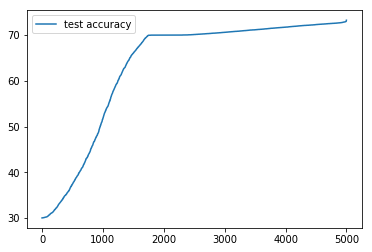

73.20006500893874


In [14]:
accm = []
posm = []
for i in range(0,5000):
    posm.append(i)
    accuracy = np.load("./perceptron_accuracy_values/polynomial/iter"+str(i)+".npy")
    accm.append(accuracy)
    
plt.plot(posm, accm, label="test accuracy")
plt.legend()
plt.show()
print(accm[len(accm) - 1])

# KERNLE BIAS

In [10]:
k=KernelBias(len(train_data[0]))
perceptron = PerceptronKernel(k.kernelDimension, 0.00001, k)
for i in range(5000):
    print("iter "+str(i))
    perceptron.train(train_set)
    accuracy = perceptron.accuracy(test_set)
    print("fin iter "+str(i))
    np.save("./perceptron_accuracy_values/bias/iter"+str(i), accuracy)

iter 0
fin iter 0
iter 1
fin iter 1
iter 2
fin iter 2
iter 3
fin iter 3
iter 4
fin iter 4
iter 5
fin iter 5
iter 6
fin iter 6
iter 7
fin iter 7
iter 8
fin iter 8
iter 9
fin iter 9
iter 10
fin iter 10
iter 11
fin iter 11
iter 12
fin iter 12
iter 13
fin iter 13
iter 14
fin iter 14
iter 15
fin iter 15
iter 16
fin iter 16
iter 17
fin iter 17
iter 18
fin iter 18
iter 19
fin iter 19
iter 20
fin iter 20
iter 21
fin iter 21
iter 22
fin iter 22
iter 23
fin iter 23
iter 24
fin iter 24
iter 25
fin iter 25
iter 26
fin iter 26
iter 27
fin iter 27
iter 28
fin iter 28
iter 29
fin iter 29
iter 30
fin iter 30
iter 31
fin iter 31
iter 32
fin iter 32
iter 33
fin iter 33
iter 34
fin iter 34
iter 35
fin iter 35
iter 36
fin iter 36
iter 37
fin iter 37
iter 38
fin iter 38
iter 39
fin iter 39
iter 40
fin iter 40
iter 41
fin iter 41
iter 42
fin iter 42
iter 43
fin iter 43
iter 44
fin iter 44
iter 45
fin iter 45
iter 46
fin iter 46
iter 47
fin iter 47
iter 48
fin iter 48
iter 49
fin iter 49
iter 50
fin iter 50


fin iter 382
iter 383
fin iter 383
iter 384
fin iter 384
iter 385
fin iter 385
iter 386
fin iter 386
iter 387
fin iter 387
iter 388
fin iter 388
iter 389
fin iter 389
iter 390
fin iter 390
iter 391
fin iter 391
iter 392
fin iter 392
iter 393
fin iter 393
iter 394
fin iter 394
iter 395
fin iter 395
iter 396
fin iter 396
iter 397
fin iter 397
iter 398
fin iter 398
iter 399
fin iter 399
iter 400
fin iter 400
iter 401
fin iter 401
iter 402
fin iter 402
iter 403
fin iter 403
iter 404
fin iter 404
iter 405
fin iter 405
iter 406
fin iter 406
iter 407
fin iter 407
iter 408
fin iter 408
iter 409
fin iter 409
iter 410
fin iter 410
iter 411
fin iter 411
iter 412
fin iter 412
iter 413
fin iter 413
iter 414
fin iter 414
iter 415
fin iter 415
iter 416
fin iter 416
iter 417
fin iter 417
iter 418
fin iter 418
iter 419
fin iter 419
iter 420
fin iter 420
iter 421
fin iter 421
iter 422
fin iter 422
iter 423
fin iter 423
iter 424
fin iter 424
iter 425
fin iter 425
iter 426
fin iter 426
iter 427
fin iter 4

fin iter 755
iter 756
fin iter 756
iter 757
fin iter 757
iter 758
fin iter 758
iter 759
fin iter 759
iter 760
fin iter 760
iter 761
fin iter 761
iter 762
fin iter 762
iter 763
fin iter 763
iter 764
fin iter 764
iter 765
fin iter 765
iter 766
fin iter 766
iter 767
fin iter 767
iter 768
fin iter 768
iter 769
fin iter 769
iter 770
fin iter 770
iter 771
fin iter 771
iter 772
fin iter 772
iter 773
fin iter 773
iter 774
fin iter 774
iter 775
fin iter 775
iter 776
fin iter 776
iter 777
fin iter 777
iter 778
fin iter 778
iter 779
fin iter 779
iter 780
fin iter 780
iter 781
fin iter 781
iter 782
fin iter 782
iter 783
fin iter 783
iter 784
fin iter 784
iter 785
fin iter 785
iter 786
fin iter 786
iter 787
fin iter 787
iter 788
fin iter 788
iter 789
fin iter 789
iter 790
fin iter 790
iter 791
fin iter 791
iter 792
fin iter 792
iter 793
fin iter 793
iter 794
fin iter 794
iter 795
fin iter 795
iter 796
fin iter 796
iter 797
fin iter 797
iter 798
fin iter 798
iter 799
fin iter 799
iter 800
fin iter 8

fin iter 1117
iter 1118
fin iter 1118
iter 1119
fin iter 1119
iter 1120
fin iter 1120
iter 1121
fin iter 1121
iter 1122
fin iter 1122
iter 1123
fin iter 1123
iter 1124
fin iter 1124
iter 1125
fin iter 1125
iter 1126
fin iter 1126
iter 1127
fin iter 1127
iter 1128
fin iter 1128
iter 1129
fin iter 1129
iter 1130
fin iter 1130
iter 1131
fin iter 1131
iter 1132
fin iter 1132
iter 1133
fin iter 1133
iter 1134
fin iter 1134
iter 1135
fin iter 1135
iter 1136
fin iter 1136
iter 1137
fin iter 1137
iter 1138
fin iter 1138
iter 1139
fin iter 1139
iter 1140
fin iter 1140
iter 1141
fin iter 1141
iter 1142
fin iter 1142
iter 1143
fin iter 1143
iter 1144
fin iter 1144
iter 1145
fin iter 1145
iter 1146
fin iter 1146
iter 1147
fin iter 1147
iter 1148
fin iter 1148
iter 1149
fin iter 1149
iter 1150
fin iter 1150
iter 1151
fin iter 1151
iter 1152
fin iter 1152
iter 1153
fin iter 1153
iter 1154
fin iter 1154
iter 1155
fin iter 1155
iter 1156
fin iter 1156
iter 1157
fin iter 1157
iter 1158
fin iter 1158
it

fin iter 1459
iter 1460
fin iter 1460
iter 1461
fin iter 1461
iter 1462
fin iter 1462
iter 1463
fin iter 1463
iter 1464
fin iter 1464
iter 1465
fin iter 1465
iter 1466
fin iter 1466
iter 1467
fin iter 1467
iter 1468
fin iter 1468
iter 1469
fin iter 1469
iter 1470
fin iter 1470
iter 1471
fin iter 1471
iter 1472
fin iter 1472
iter 1473
fin iter 1473
iter 1474
fin iter 1474
iter 1475
fin iter 1475
iter 1476
fin iter 1476
iter 1477
fin iter 1477
iter 1478
fin iter 1478
iter 1479
fin iter 1479
iter 1480
fin iter 1480
iter 1481
fin iter 1481
iter 1482
fin iter 1482
iter 1483
fin iter 1483
iter 1484
fin iter 1484
iter 1485
fin iter 1485
iter 1486
fin iter 1486
iter 1487
fin iter 1487
iter 1488
fin iter 1488
iter 1489
fin iter 1489
iter 1490
fin iter 1490
iter 1491
fin iter 1491
iter 1492
fin iter 1492
iter 1493
fin iter 1493
iter 1494
fin iter 1494
iter 1495
fin iter 1495
iter 1496
fin iter 1496
iter 1497
fin iter 1497
iter 1498
fin iter 1498
iter 1499
fin iter 1499
iter 1500
fin iter 1500
it

fin iter 1801
iter 1802
fin iter 1802
iter 1803
fin iter 1803
iter 1804
fin iter 1804
iter 1805
fin iter 1805
iter 1806
fin iter 1806
iter 1807
fin iter 1807
iter 1808
fin iter 1808
iter 1809
fin iter 1809
iter 1810
fin iter 1810
iter 1811
fin iter 1811
iter 1812
fin iter 1812
iter 1813
fin iter 1813
iter 1814
fin iter 1814
iter 1815
fin iter 1815
iter 1816
fin iter 1816
iter 1817
fin iter 1817
iter 1818
fin iter 1818
iter 1819
fin iter 1819
iter 1820
fin iter 1820
iter 1821
fin iter 1821
iter 1822
fin iter 1822
iter 1823
fin iter 1823
iter 1824
fin iter 1824
iter 1825
fin iter 1825
iter 1826
fin iter 1826
iter 1827
fin iter 1827
iter 1828
fin iter 1828
iter 1829
fin iter 1829
iter 1830
fin iter 1830
iter 1831
fin iter 1831
iter 1832
fin iter 1832
iter 1833
fin iter 1833
iter 1834
fin iter 1834
iter 1835
fin iter 1835
iter 1836
fin iter 1836
iter 1837
fin iter 1837
iter 1838
fin iter 1838
iter 1839
fin iter 1839
iter 1840
fin iter 1840
iter 1841
fin iter 1841
iter 1842
fin iter 1842
it

fin iter 2143
iter 2144
fin iter 2144
iter 2145
fin iter 2145
iter 2146
fin iter 2146
iter 2147
fin iter 2147
iter 2148
fin iter 2148
iter 2149
fin iter 2149
iter 2150
fin iter 2150
iter 2151
fin iter 2151
iter 2152
fin iter 2152
iter 2153
fin iter 2153
iter 2154
fin iter 2154
iter 2155
fin iter 2155
iter 2156
fin iter 2156
iter 2157
fin iter 2157
iter 2158
fin iter 2158
iter 2159
fin iter 2159
iter 2160
fin iter 2160
iter 2161
fin iter 2161
iter 2162
fin iter 2162
iter 2163
fin iter 2163
iter 2164
fin iter 2164
iter 2165
fin iter 2165
iter 2166
fin iter 2166
iter 2167
fin iter 2167
iter 2168
fin iter 2168
iter 2169
fin iter 2169
iter 2170
fin iter 2170
iter 2171
fin iter 2171
iter 2172
fin iter 2172
iter 2173
fin iter 2173
iter 2174
fin iter 2174
iter 2175
fin iter 2175
iter 2176
fin iter 2176
iter 2177
fin iter 2177
iter 2178
fin iter 2178
iter 2179
fin iter 2179
iter 2180
fin iter 2180
iter 2181
fin iter 2181
iter 2182
fin iter 2182
iter 2183
fin iter 2183
iter 2184
fin iter 2184
it

fin iter 2485
iter 2486
fin iter 2486
iter 2487
fin iter 2487
iter 2488
fin iter 2488
iter 2489
fin iter 2489
iter 2490
fin iter 2490
iter 2491
fin iter 2491
iter 2492
fin iter 2492
iter 2493
fin iter 2493
iter 2494
fin iter 2494
iter 2495
fin iter 2495
iter 2496
fin iter 2496
iter 2497
fin iter 2497
iter 2498
fin iter 2498
iter 2499
fin iter 2499
iter 2500
fin iter 2500
iter 2501
fin iter 2501
iter 2502
fin iter 2502
iter 2503
fin iter 2503
iter 2504
fin iter 2504
iter 2505
fin iter 2505
iter 2506
fin iter 2506
iter 2507
fin iter 2507
iter 2508
fin iter 2508
iter 2509
fin iter 2509
iter 2510
fin iter 2510
iter 2511
fin iter 2511
iter 2512
fin iter 2512
iter 2513
fin iter 2513
iter 2514
fin iter 2514
iter 2515
fin iter 2515
iter 2516
fin iter 2516
iter 2517
fin iter 2517
iter 2518
fin iter 2518
iter 2519
fin iter 2519
iter 2520
fin iter 2520
iter 2521
fin iter 2521
iter 2522
fin iter 2522
iter 2523
fin iter 2523
iter 2524
fin iter 2524
iter 2525
fin iter 2525
iter 2526
fin iter 2526
it

fin iter 2827
iter 2828
fin iter 2828
iter 2829
fin iter 2829
iter 2830
fin iter 2830
iter 2831
fin iter 2831
iter 2832
fin iter 2832
iter 2833
fin iter 2833
iter 2834
fin iter 2834
iter 2835
fin iter 2835
iter 2836
fin iter 2836
iter 2837
fin iter 2837
iter 2838
fin iter 2838
iter 2839
fin iter 2839
iter 2840
fin iter 2840
iter 2841
fin iter 2841
iter 2842
fin iter 2842
iter 2843
fin iter 2843
iter 2844
fin iter 2844
iter 2845
fin iter 2845
iter 2846
fin iter 2846
iter 2847
fin iter 2847
iter 2848
fin iter 2848
iter 2849
fin iter 2849
iter 2850
fin iter 2850
iter 2851
fin iter 2851
iter 2852
fin iter 2852
iter 2853
fin iter 2853
iter 2854
fin iter 2854
iter 2855
fin iter 2855
iter 2856
fin iter 2856
iter 2857
fin iter 2857
iter 2858
fin iter 2858
iter 2859
fin iter 2859
iter 2860
fin iter 2860
iter 2861
fin iter 2861
iter 2862
fin iter 2862
iter 2863
fin iter 2863
iter 2864
fin iter 2864
iter 2865
fin iter 2865
iter 2866
fin iter 2866
iter 2867
fin iter 2867
iter 2868
fin iter 2868
it

fin iter 3169
iter 3170
fin iter 3170
iter 3171
fin iter 3171
iter 3172
fin iter 3172
iter 3173
fin iter 3173
iter 3174
fin iter 3174
iter 3175
fin iter 3175
iter 3176
fin iter 3176
iter 3177
fin iter 3177
iter 3178
fin iter 3178
iter 3179
fin iter 3179
iter 3180
fin iter 3180
iter 3181
fin iter 3181
iter 3182
fin iter 3182
iter 3183
fin iter 3183
iter 3184
fin iter 3184
iter 3185
fin iter 3185
iter 3186
fin iter 3186
iter 3187
fin iter 3187
iter 3188
fin iter 3188
iter 3189
fin iter 3189
iter 3190
fin iter 3190
iter 3191
fin iter 3191
iter 3192
fin iter 3192
iter 3193
fin iter 3193
iter 3194
fin iter 3194
iter 3195
fin iter 3195
iter 3196
fin iter 3196
iter 3197
fin iter 3197
iter 3198
fin iter 3198
iter 3199
fin iter 3199
iter 3200
fin iter 3200
iter 3201
fin iter 3201
iter 3202
fin iter 3202
iter 3203
fin iter 3203
iter 3204
fin iter 3204
iter 3205
fin iter 3205
iter 3206
fin iter 3206
iter 3207
fin iter 3207
iter 3208
fin iter 3208
iter 3209
fin iter 3209
iter 3210
fin iter 3210
it

fin iter 3511
iter 3512
fin iter 3512
iter 3513
fin iter 3513
iter 3514
fin iter 3514
iter 3515
fin iter 3515
iter 3516
fin iter 3516
iter 3517
fin iter 3517
iter 3518
fin iter 3518
iter 3519
fin iter 3519
iter 3520
fin iter 3520
iter 3521
fin iter 3521
iter 3522
fin iter 3522
iter 3523
fin iter 3523
iter 3524
fin iter 3524
iter 3525
fin iter 3525
iter 3526
fin iter 3526
iter 3527
fin iter 3527
iter 3528
fin iter 3528
iter 3529
fin iter 3529
iter 3530
fin iter 3530
iter 3531
fin iter 3531
iter 3532
fin iter 3532
iter 3533
fin iter 3533
iter 3534
fin iter 3534
iter 3535
fin iter 3535
iter 3536
fin iter 3536
iter 3537
fin iter 3537
iter 3538
fin iter 3538
iter 3539
fin iter 3539
iter 3540
fin iter 3540
iter 3541
fin iter 3541
iter 3542
fin iter 3542
iter 3543
fin iter 3543
iter 3544
fin iter 3544
iter 3545
fin iter 3545
iter 3546
fin iter 3546
iter 3547
fin iter 3547
iter 3548
fin iter 3548
iter 3549
fin iter 3549
iter 3550
fin iter 3550
iter 3551
fin iter 3551
iter 3552
fin iter 3552
it

fin iter 3853
iter 3854
fin iter 3854
iter 3855
fin iter 3855
iter 3856
fin iter 3856
iter 3857
fin iter 3857
iter 3858
fin iter 3858
iter 3859
fin iter 3859
iter 3860
fin iter 3860
iter 3861
fin iter 3861
iter 3862
fin iter 3862
iter 3863
fin iter 3863
iter 3864
fin iter 3864
iter 3865
fin iter 3865
iter 3866
fin iter 3866
iter 3867
fin iter 3867
iter 3868
fin iter 3868
iter 3869
fin iter 3869
iter 3870
fin iter 3870
iter 3871
fin iter 3871
iter 3872
fin iter 3872
iter 3873
fin iter 3873
iter 3874
fin iter 3874
iter 3875
fin iter 3875
iter 3876
fin iter 3876
iter 3877
fin iter 3877
iter 3878
fin iter 3878
iter 3879
fin iter 3879
iter 3880
fin iter 3880
iter 3881
fin iter 3881
iter 3882
fin iter 3882
iter 3883
fin iter 3883
iter 3884
fin iter 3884
iter 3885
fin iter 3885
iter 3886
fin iter 3886
iter 3887
fin iter 3887
iter 3888
fin iter 3888
iter 3889
fin iter 3889
iter 3890
fin iter 3890
iter 3891
fin iter 3891
iter 3892
fin iter 3892
iter 3893
fin iter 3893
iter 3894
fin iter 3894
it

fin iter 4195
iter 4196
fin iter 4196
iter 4197
fin iter 4197
iter 4198
fin iter 4198
iter 4199
fin iter 4199
iter 4200
fin iter 4200
iter 4201
fin iter 4201
iter 4202
fin iter 4202
iter 4203
fin iter 4203
iter 4204
fin iter 4204
iter 4205
fin iter 4205
iter 4206
fin iter 4206
iter 4207
fin iter 4207
iter 4208
fin iter 4208
iter 4209
fin iter 4209
iter 4210
fin iter 4210
iter 4211
fin iter 4211
iter 4212
fin iter 4212
iter 4213
fin iter 4213
iter 4214
fin iter 4214
iter 4215
fin iter 4215
iter 4216
fin iter 4216
iter 4217
fin iter 4217
iter 4218
fin iter 4218
iter 4219
fin iter 4219
iter 4220
fin iter 4220
iter 4221
fin iter 4221
iter 4222
fin iter 4222
iter 4223
fin iter 4223
iter 4224
fin iter 4224
iter 4225
fin iter 4225
iter 4226
fin iter 4226
iter 4227
fin iter 4227
iter 4228
fin iter 4228
iter 4229
fin iter 4229
iter 4230
fin iter 4230
iter 4231
fin iter 4231
iter 4232
fin iter 4232
iter 4233
fin iter 4233
iter 4234
fin iter 4234
iter 4235
fin iter 4235
iter 4236
fin iter 4236
it

fin iter 4537
iter 4538
fin iter 4538
iter 4539
fin iter 4539
iter 4540
fin iter 4540
iter 4541
fin iter 4541
iter 4542
fin iter 4542
iter 4543
fin iter 4543
iter 4544
fin iter 4544
iter 4545
fin iter 4545
iter 4546
fin iter 4546
iter 4547
fin iter 4547
iter 4548
fin iter 4548
iter 4549
fin iter 4549
iter 4550
fin iter 4550
iter 4551
fin iter 4551
iter 4552
fin iter 4552
iter 4553
fin iter 4553
iter 4554
fin iter 4554
iter 4555
fin iter 4555
iter 4556
fin iter 4556
iter 4557
fin iter 4557
iter 4558
fin iter 4558
iter 4559
fin iter 4559
iter 4560
fin iter 4560
iter 4561
fin iter 4561
iter 4562
fin iter 4562
iter 4563
fin iter 4563
iter 4564
fin iter 4564
iter 4565
fin iter 4565
iter 4566
fin iter 4566
iter 4567
fin iter 4567
iter 4568
fin iter 4568
iter 4569
fin iter 4569
iter 4570
fin iter 4570
iter 4571
fin iter 4571
iter 4572
fin iter 4572
iter 4573
fin iter 4573
iter 4574
fin iter 4574
iter 4575
fin iter 4575
iter 4576
fin iter 4576
iter 4577
fin iter 4577
iter 4578
fin iter 4578
it

fin iter 4879
iter 4880
fin iter 4880
iter 4881
fin iter 4881
iter 4882
fin iter 4882
iter 4883
fin iter 4883
iter 4884
fin iter 4884
iter 4885
fin iter 4885
iter 4886
fin iter 4886
iter 4887
fin iter 4887
iter 4888
fin iter 4888
iter 4889
fin iter 4889
iter 4890
fin iter 4890
iter 4891
fin iter 4891
iter 4892
fin iter 4892
iter 4893
fin iter 4893
iter 4894
fin iter 4894
iter 4895
fin iter 4895
iter 4896
fin iter 4896
iter 4897
fin iter 4897
iter 4898
fin iter 4898
iter 4899
fin iter 4899
iter 4900
fin iter 4900
iter 4901
fin iter 4901
iter 4902
fin iter 4902
iter 4903
fin iter 4903
iter 4904
fin iter 4904
iter 4905
fin iter 4905
iter 4906
fin iter 4906
iter 4907
fin iter 4907
iter 4908
fin iter 4908
iter 4909
fin iter 4909
iter 4910
fin iter 4910
iter 4911
fin iter 4911
iter 4912
fin iter 4912
iter 4913
fin iter 4913
iter 4914
fin iter 4914
iter 4915
fin iter 4915
iter 4916
fin iter 4916
iter 4917
fin iter 4917
iter 4918
fin iter 4918
iter 4919
fin iter 4919
iter 4920
fin iter 4920
it

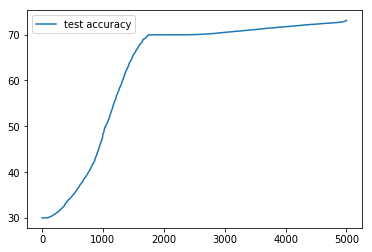

73.11880383552737


In [15]:
accm2 = []
posm2 = []
for i in range(0,5000):
    posm2.append(i)
    accuracy = np.load("./perceptron_accuracy_values/bias/iter"+str(i)+".npy")
    accm2.append(accuracy)
    
plt.plot(posm2, accm2, label="test accuracy")
plt.legend()
plt.show()
print(accm2[len(accm2) - 1])